In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
data = pd.read_csv('cleaned_data.csv')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27849 entries, 0 to 27848
Data columns (total 28 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Unnamed: 0                                                   27849 non-null  int64  
 1   time                                                         27849 non-null  object 
 2   age                                                          27849 non-null  object 
 3   industry                                                     27779 non-null  object 
 4   job                                                          27849 non-null  object 
 5   job_context                                                  7204 non-null   object 
 6   annual_income                                                27849 non-null  int64  
 7   compensation                                                 27849 non-null 

In [3]:
#drop some columns
columns = [
           'age', 
           'industry',  
           'country',  
           'overall_experience',
           'field_experience', 
           'education', 
           'gender', 
           'annual_income_usd',
           'compensation_usd', 
           'race_White',
           'race_Hispanic, Latino, or Spanish origin',
           'race_Asian or Asian American',
           'race_Another option not listed here or prefer not to answer',
           'race_Middle Eastern or Northern African',
           'race_Black or African American',
           'race_Native American or Alaska Native']
data = data[columns].copy()
data

,age,industry,country,overall_experience,field_experience,education,gender,annual_income_usd,compensation_usd,race_White,"race_Hispanic, Latino, or Spanish origin",race_Asian or Asian American,race_Another option not listed here or prefer not to answer,race_Middle Eastern or Northern African,race_Black or African American,race_Native American or Alaska Native
0,25-34,Education (Higher Education),United States,5-7 years,5-7 years,Master's degree,Woman,55000,0.0,True,False,False,False,False,False,False
1,25-34,Computing or Tech,United Kingdom,8 - 10 years,5-7 years,College degree,Non-binary,43347,3175.0,True,False,False,False,False,False,False
2,25-34,"Accounting, Banking & Finance",Australia,2 - 4 years,2 - 4 years,College degree,Woman,34000,0.0,True,False,False,False,False,False,False
3,25-34,Nonprofits,Cyprus,8 - 10 years,5-7 years,College degree,Woman,62000,3000.0,True,False,False,False,False,False,False
4,25-34,"Accounting, Banking & Finance",Australia,8 - 10 years,5-7 years,College degree,Woman,60000,7000.0,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27844,18-24,Clinical research and development,Australia,2 - 4 years,2 - 4 years,College degree,Man,49214,703.0,True,False,False,False,False,False,False
27845,35-44,"Accounting, Banking & Finance",United States,5-7 years,5-7 years,College degree,Woman,64000,0.0,False,True,False,False,False,False,False
27846,35-44,Law,Nigeria,11 - 20 years,11 - 20 years,Master's degree,Woman,7767100,0.0,False,False,False,True,False,False,False
27847,25-34,"Accounting, Banking & Finance",Australia,5-7 years,2 - 4 years,College degree,Other or prefer not to answer,83000,0.0,True,False,False,False,False,False,False


In [24]:
categorical_columns = [
    'age',
    'overall_experience',
    'field_experience', 
    'education', 
    'gender',
    ]

categorical_columns_extended = [
    'industry',
    'country'
]

columns_races = [
    'race_White',
    'race_Hispanic, Latino, or Spanish origin',
    'race_Asian or Asian American',
    'race_Another option not listed here or prefer not to answer',
    'race_Middle Eastern or Northern African',
    'race_Black or African American',
    'race_Native American or Alaska Native' 
]
nominal_columns = [
    'annual_income_usd',
    'compensation_usd',
]

In [5]:
target='income'
data['income'] = data['annual_income_usd'] + data['compensation_usd']

In [6]:
data[target].describe()

count    2.784600e+04
mean     6.108841e+08
std      8.755813e+10
min      0.000000e+00
25%      5.500000e+04
50%      8.000000e+04
75%      1.190000e+05
max      1.437535e+13
Name: income, dtype: float64

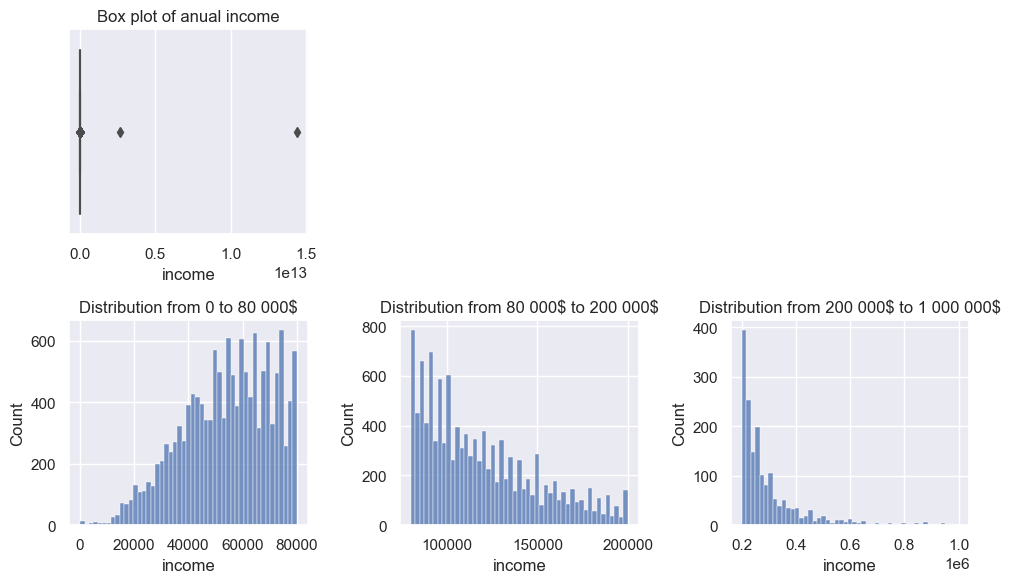

In [55]:
def plot_income_distr(data, target, name=None):
    fig, axes = plt.subplots(2,3)
    if name:
        plt.suptitle(f'Income distr by {name}')
    fig.set_size_inches((10,6))
    fig.delaxes(axes[0,1])
    fig.delaxes(axes[0,2])
    sns.boxplot(data=data, x=target, ax=axes[0,0])
    axes[0,0].set_title('Box plot of anual income')

    bins = np.linspace(0, 80000, 50)
    sns.histplot(data=data, x=target, bins=bins, ax = axes[1,0])
    axes[1,0].set_title('Distribution from 0 to 80 000$')

    bins = np.linspace(80000, 200000, 50)
    sns.histplot(data=data, x=target, bins=bins, ax = axes [1,1])
    axes[1,1].set_title('Distribution from 80 000\$ to 200 000\$')

    bins = np.linspace(200000, 1000000, 50)
    sns.histplot(data=data, x=target, bins=bins, ax = axes [1,2])
    axes[1,2].set_title('Distribution from 200 000\$ to 1 000 000\$')
    plt.tight_layout()
    plt.show()
plot_income_distr(data, target)

In [8]:
def hist_target(data, target, hue=None):
    fig, axes = plt.subplots(1,3)
    fig.set_size_inches((12,4))

    bins = np.linspace(0, 80000, 50)
    sns.hist(data=data, x=target, bins=bins, ax = axes[0], hue=hue, legend=False)
    axes[0].set_title('Distr from 0 to 80 000$')
    
    bins = np.linspace(80000, 200000, 50)
    sns.histplot(data=data, x=target, bins=bins, ax = axes [1], hue=hue,legend=False)
    axes[1].set_title('Distr from 80 000\$ to 200 000\$')

    bins = np.linspace(200000, 1000000, 50)
    sns.histplot(data=data, x=target, bins=bins, ax = axes [2], hue=hue)
    axes[2].set_title('Distr from 200 000\$ to 1 000 000\$')
    sns.move_legend(axes[2], "upper left", bbox_to_anchor=(1, 1))
    plt.show()b

<Axes: xlabel='income', ylabel='Proportion'>

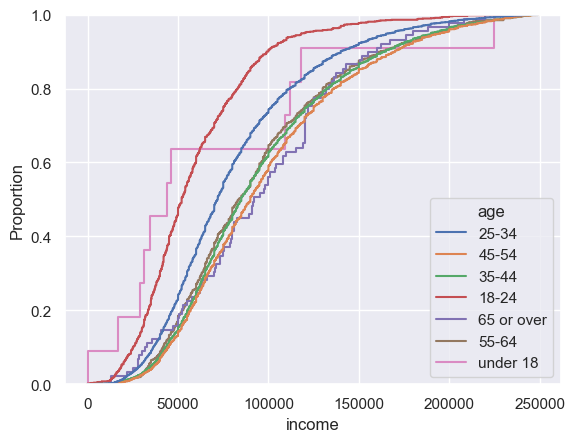

In [53]:
mask = data['income'] < 250000
sns.ecdfplot(data=data[mask], x=target,  hue='age' )


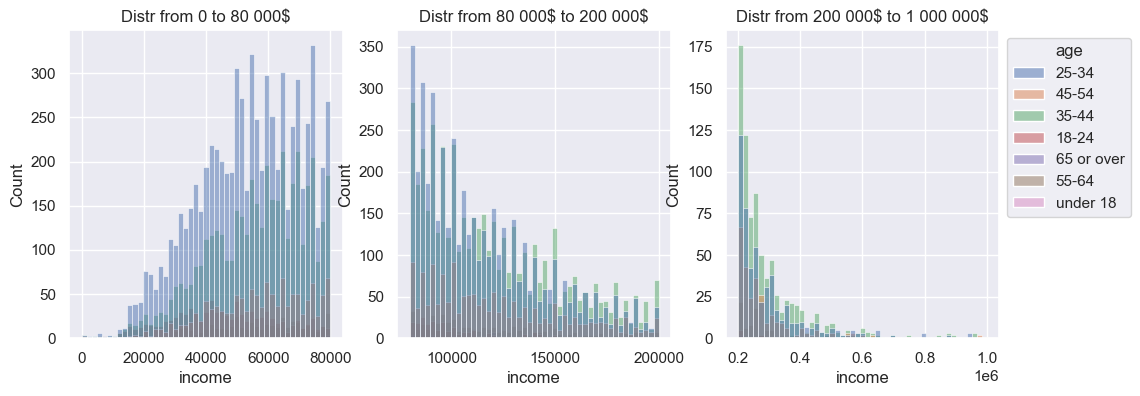

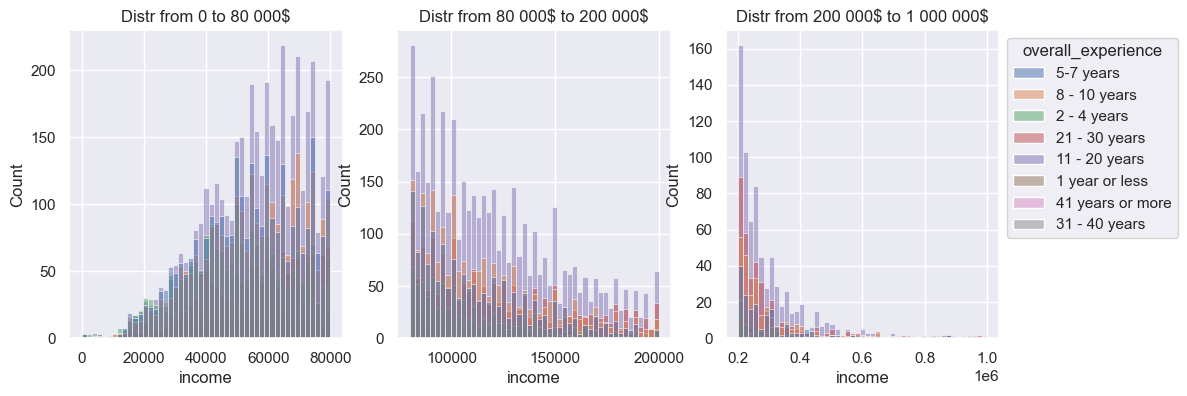

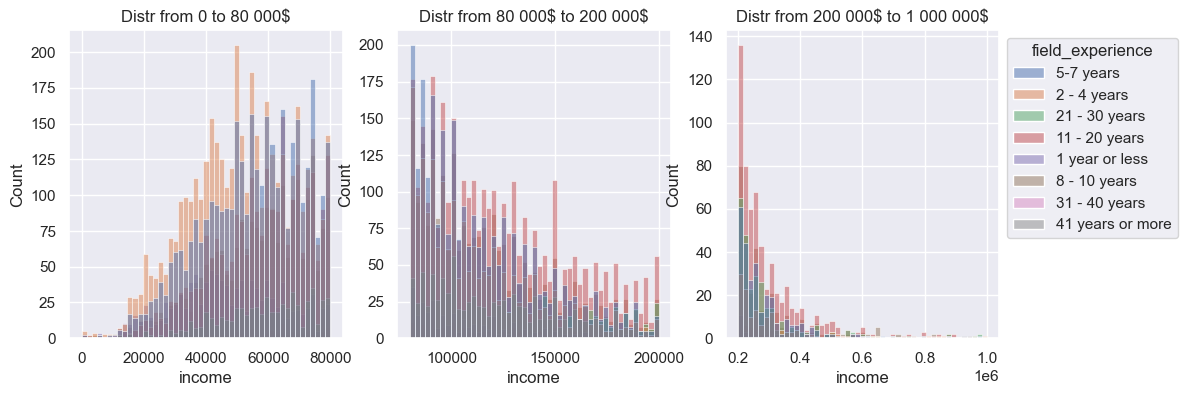

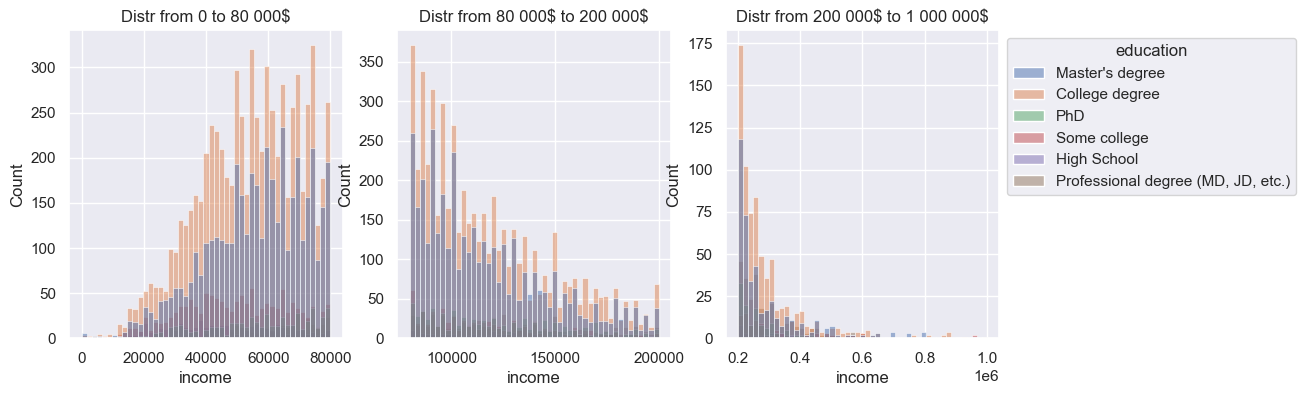

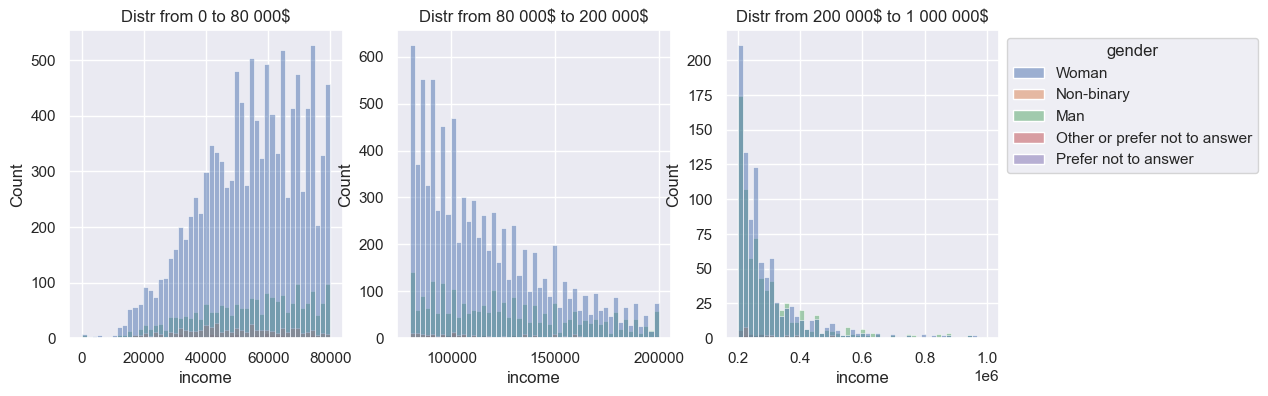

In [9]:
for name in categorical_columns:
    hist_target(data, target, hue=name)

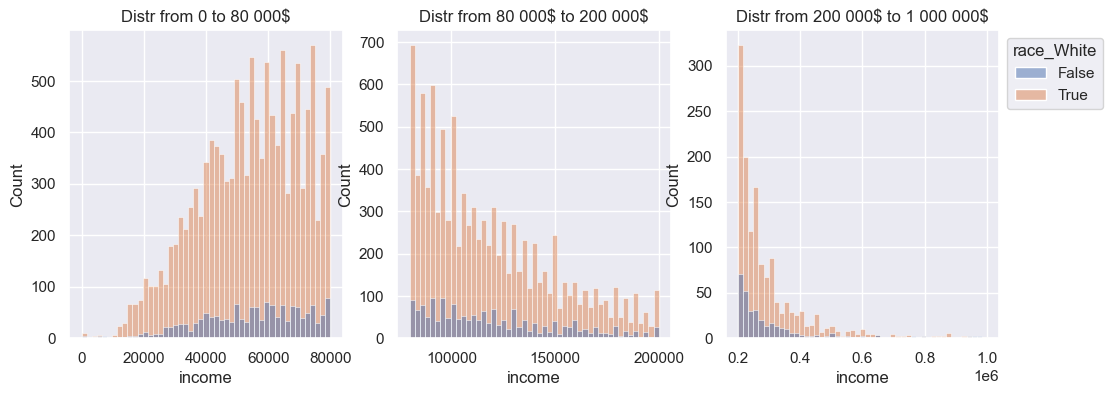

In [10]:
hist_target(data, target, hue='race_White')

### income by top countries

In [28]:
countries = list(data['country'].value_counts().head(10).index)
countries

['United States',
 'Cyprus',
 'Australia',
 'Canada',
 'Ukraine',
 'United Kingdom',
 'Virgin Islands, U.S.',
 'Germany',
 'Greenland',
 'Ireland']

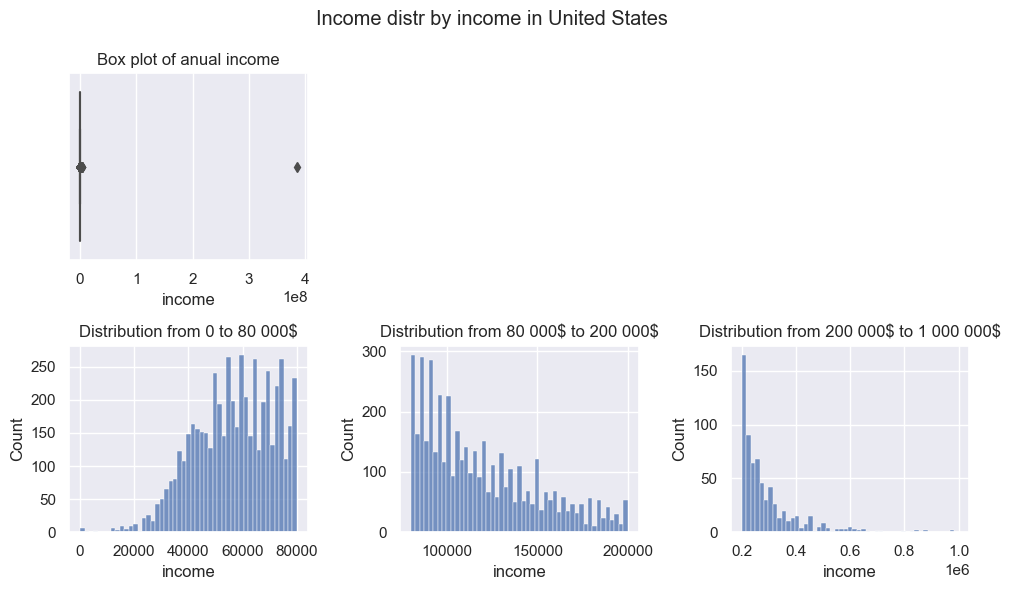

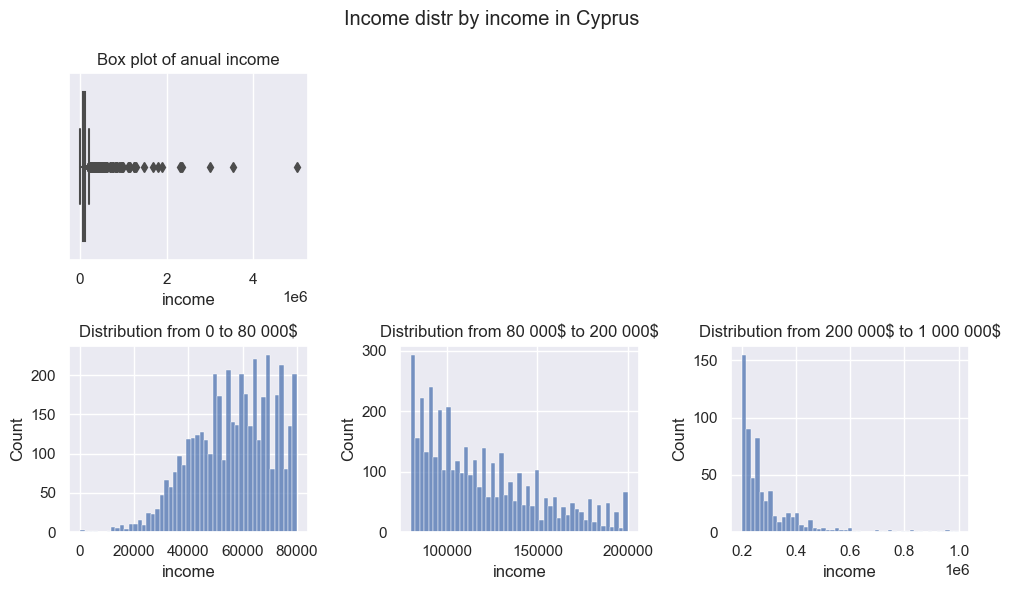

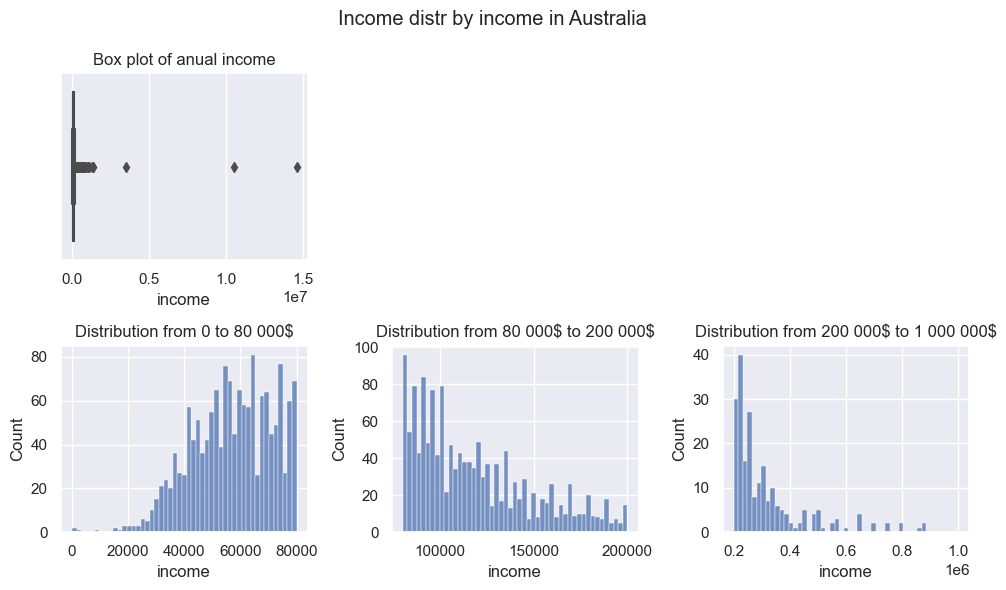

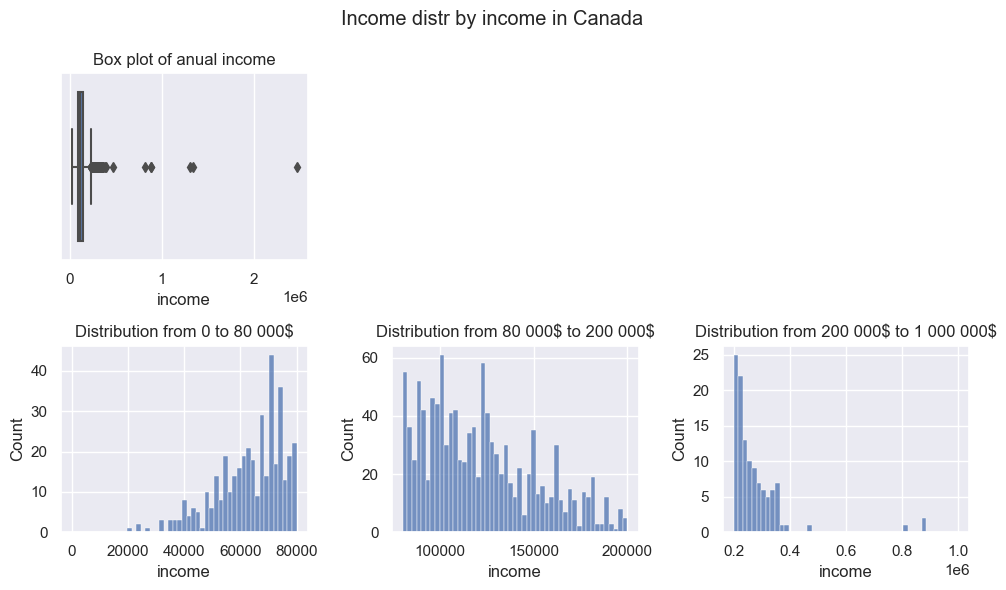

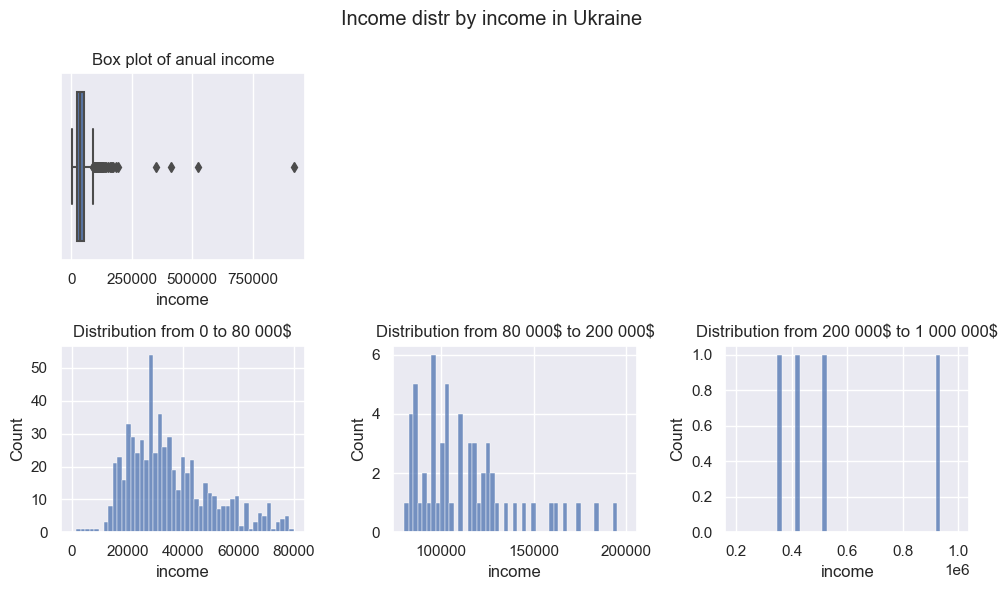

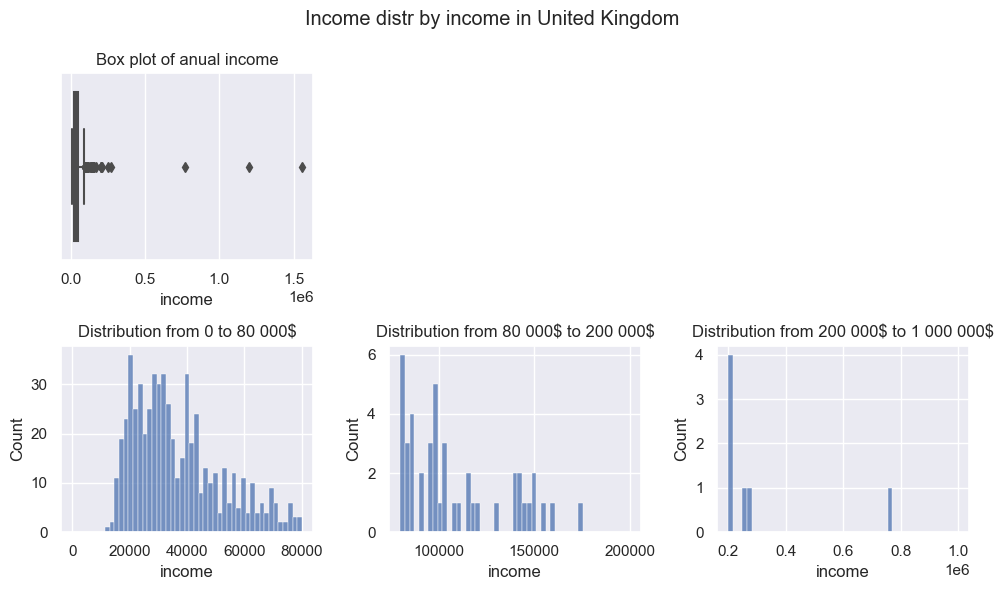

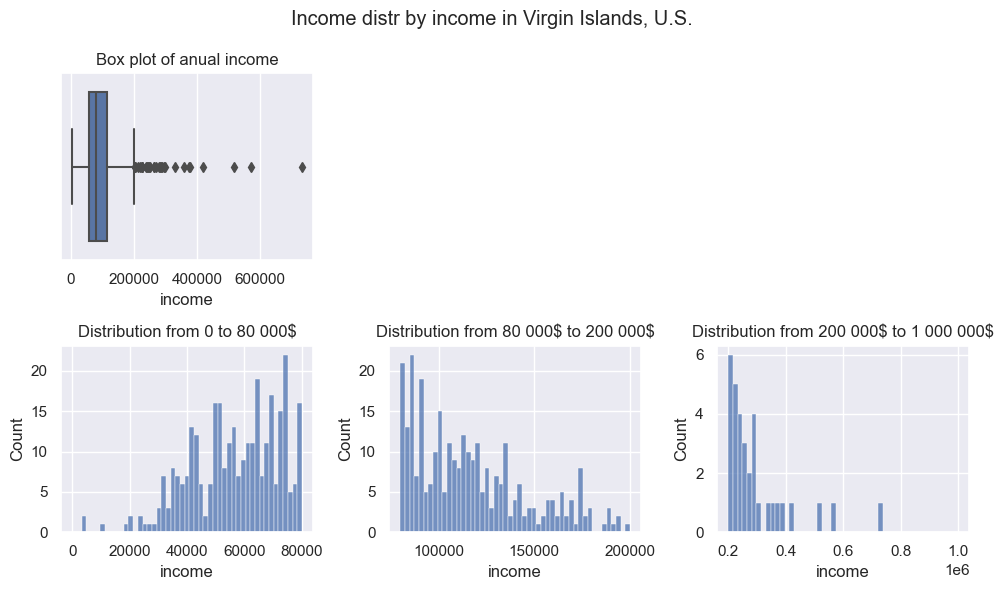

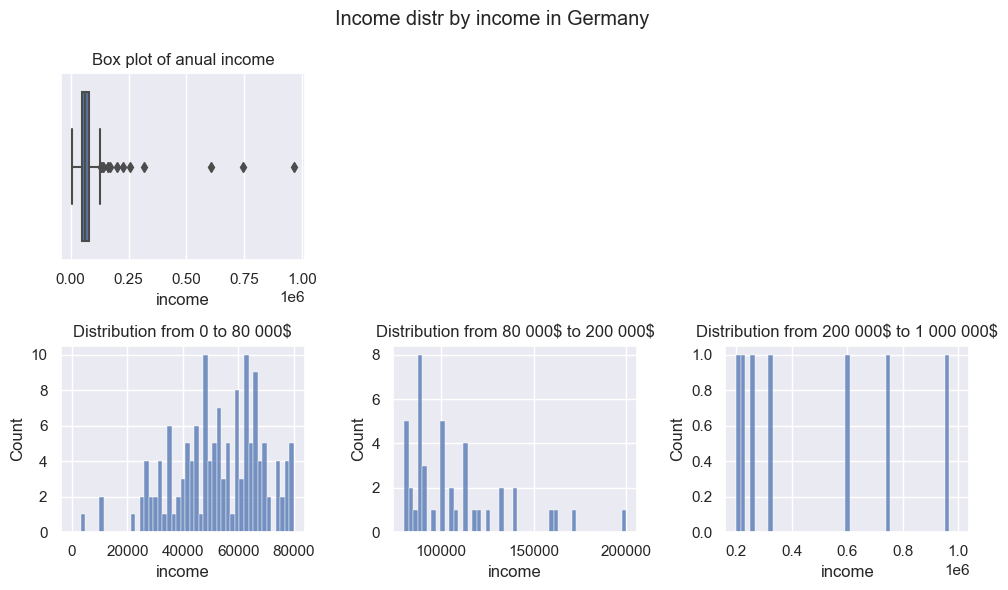

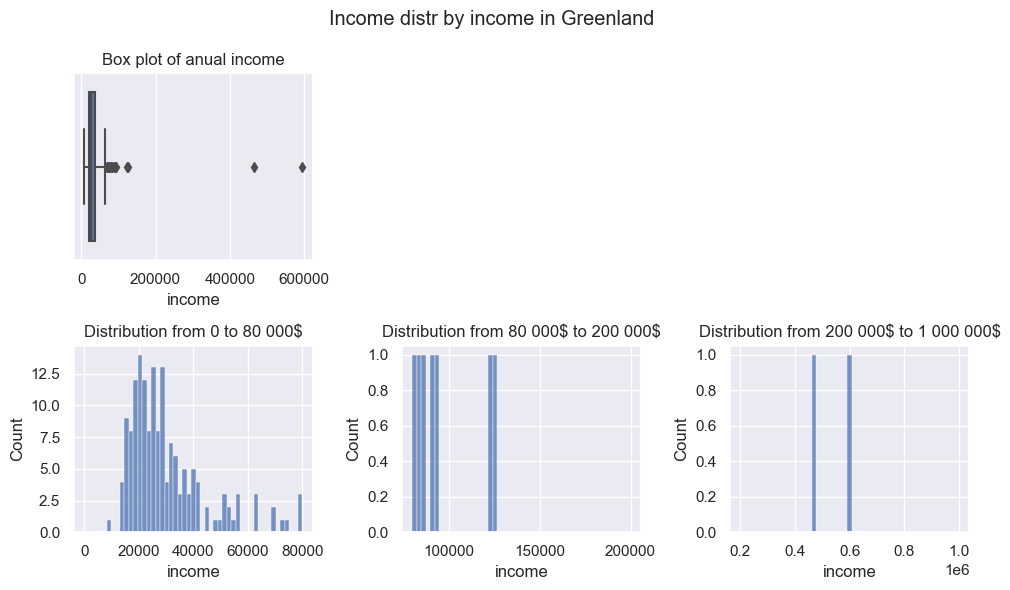

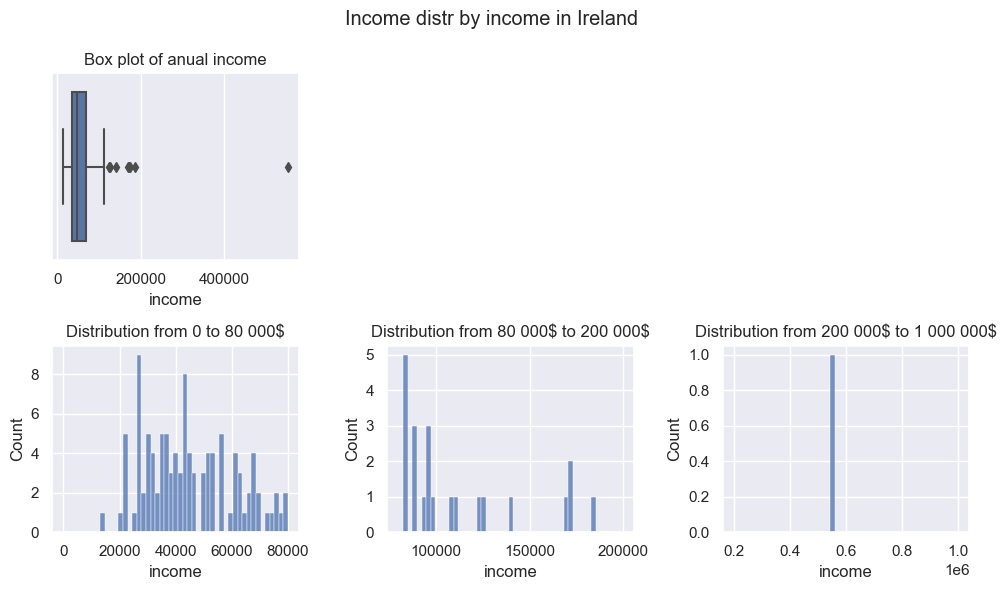

In [56]:
for country in countries:
    mask = data['country'] == country
    plot_income_distr(data[mask], target, name=f'income in {country}')

### income by top industries

In [40]:
industries = list(data['industry'].value_counts().head(10).index)
industries

['Computing or Tech',
 'Education (Higher Education)',
 'Nonprofits',
 'Government and Public Administration',
 'Health care',
 'Accounting, Banking & Finance',
 'Engineering or Manufacturing',
 'Marketing, Advertising & PR',
 'Law',
 'Outsourcing Services ']

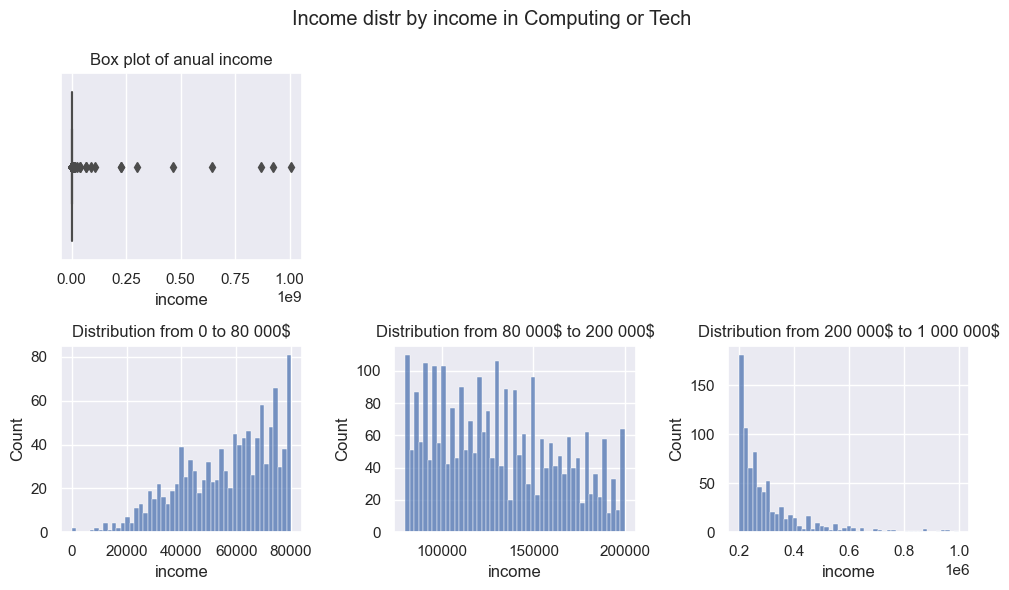

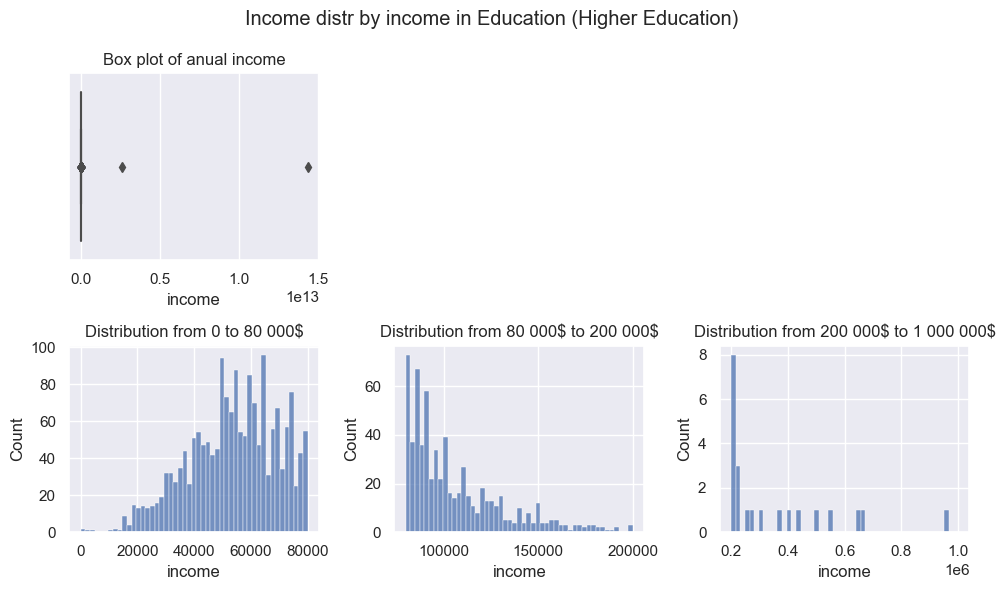

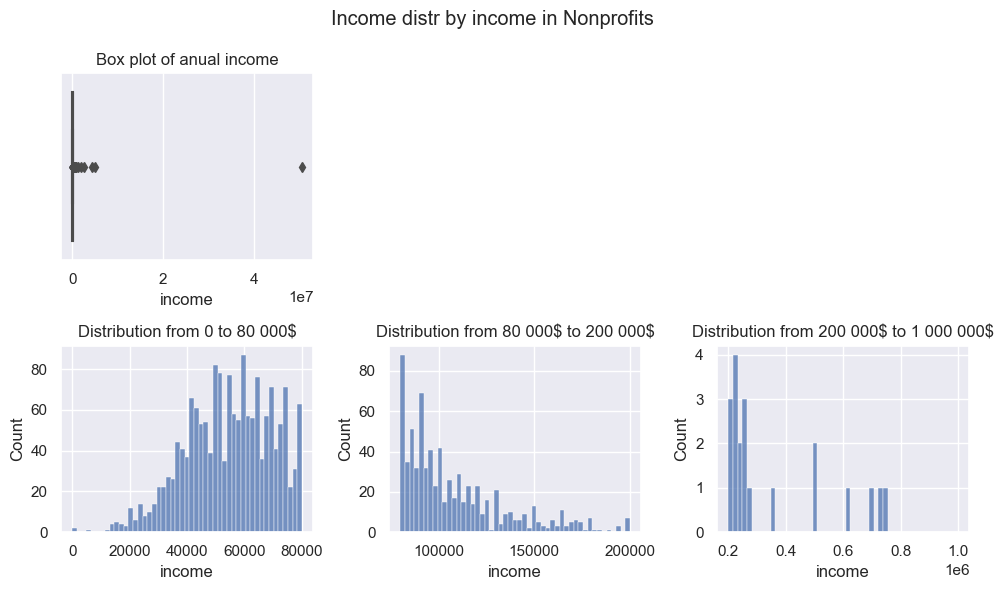

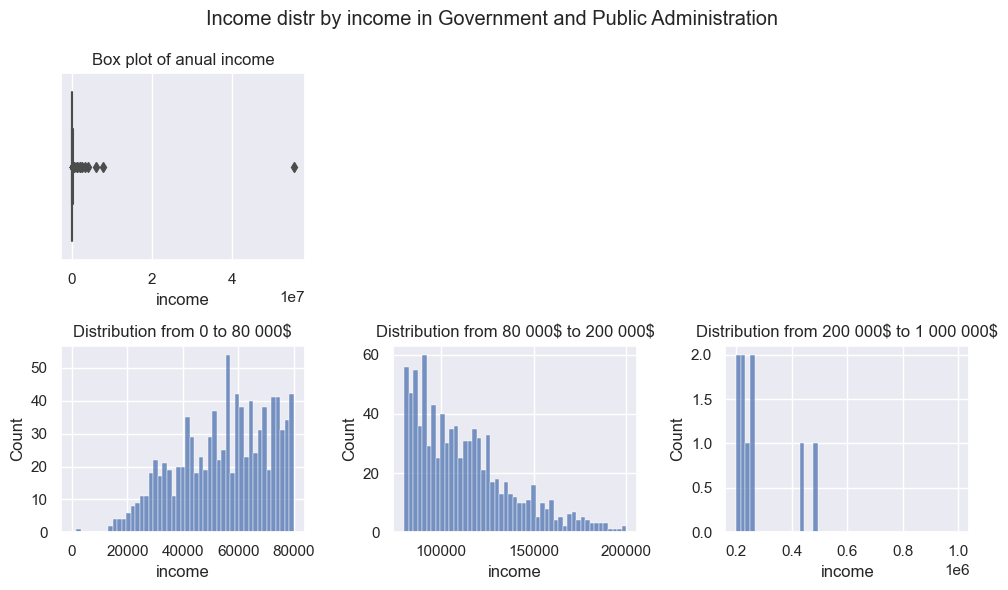

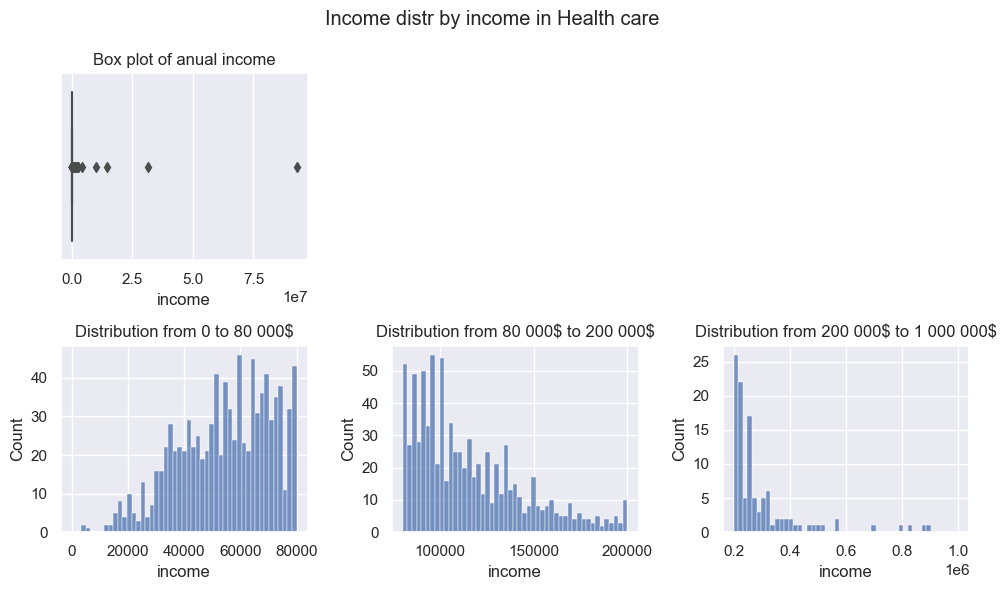

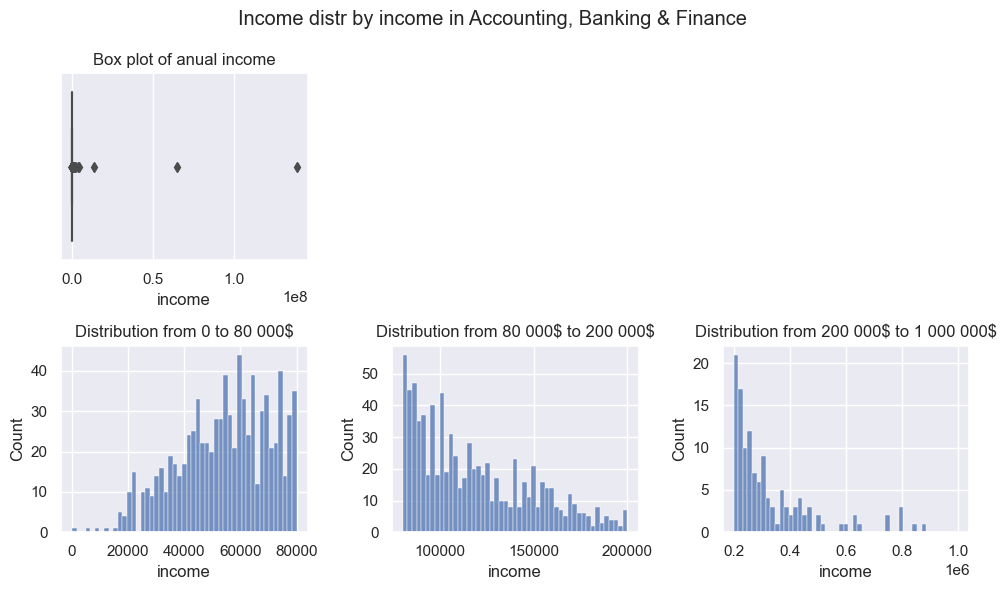

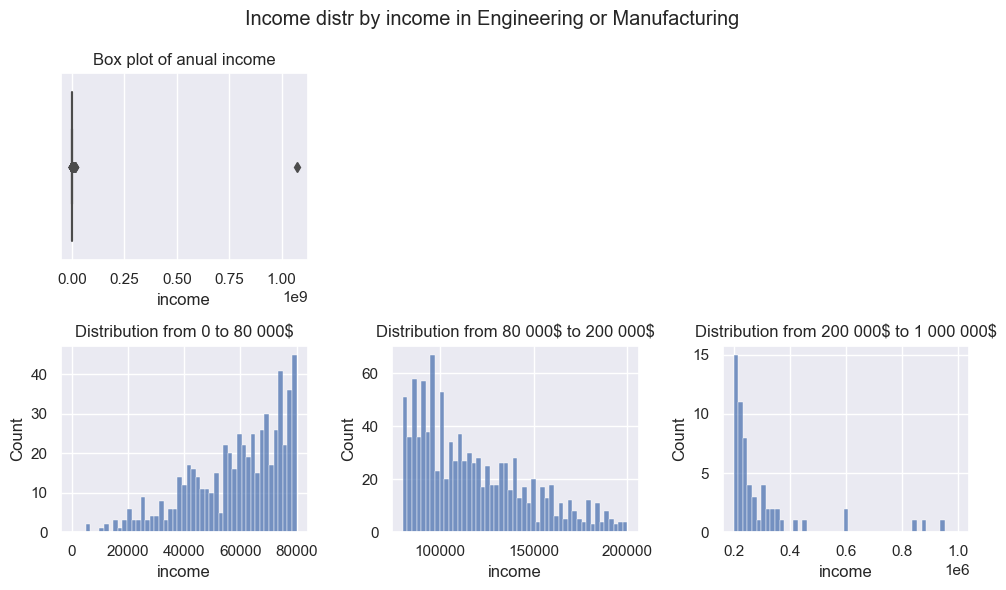

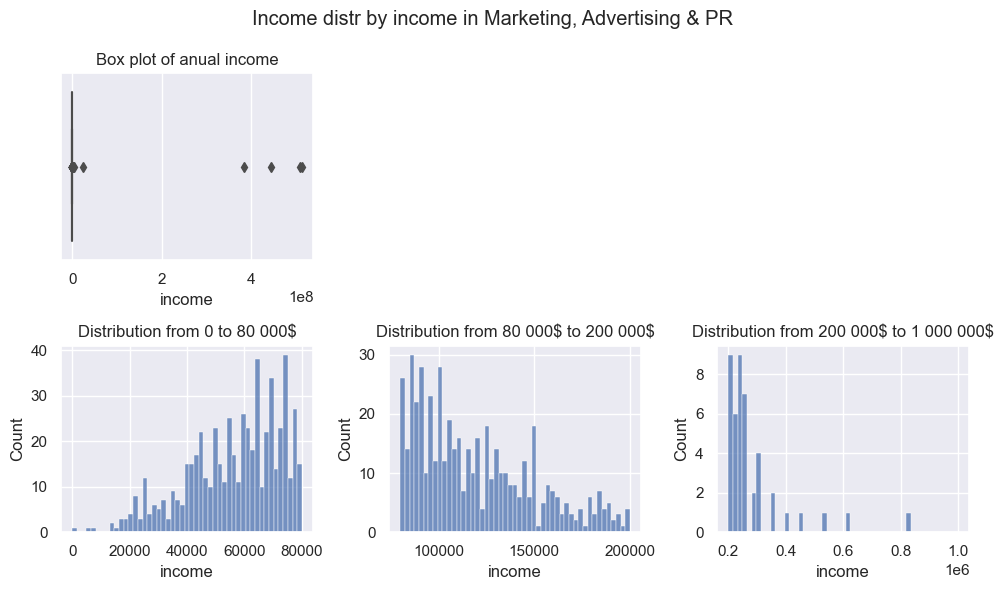

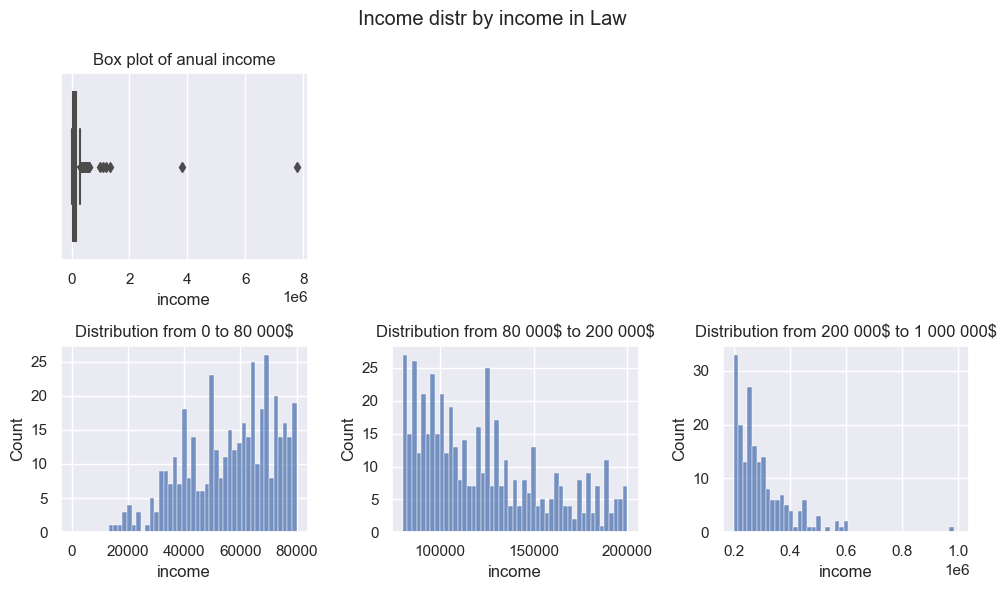

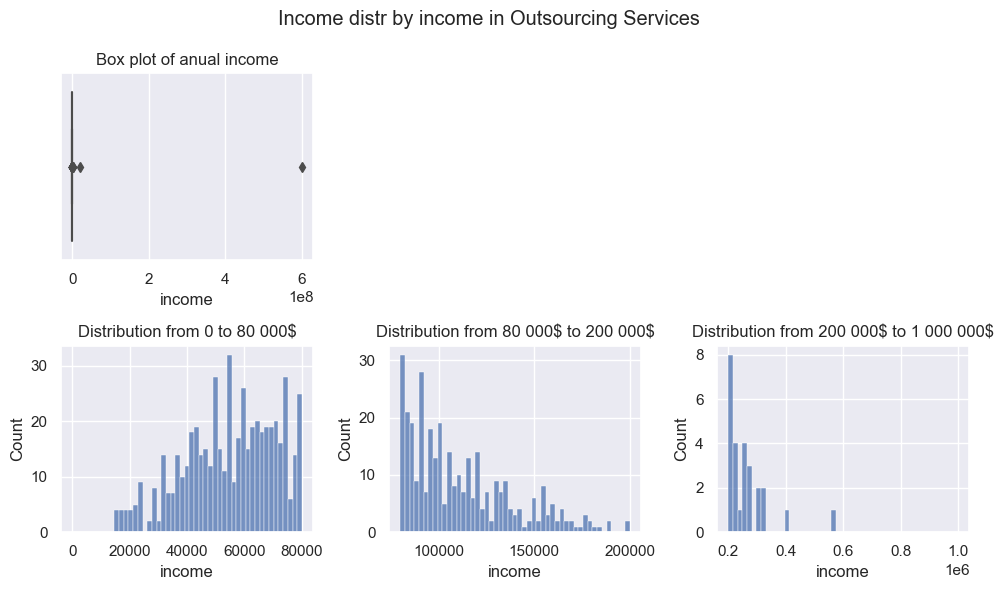

In [57]:
for industry in industries:
    mask = data['industry'] == industry
    plot_income_distr(data[mask], target, name=f'income in {industry}')

# Categorical 

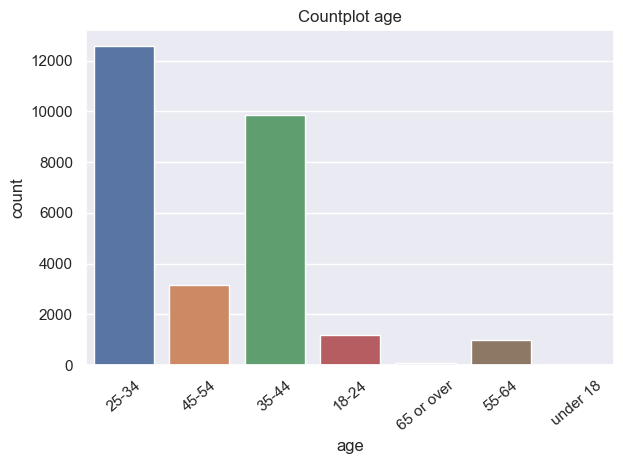

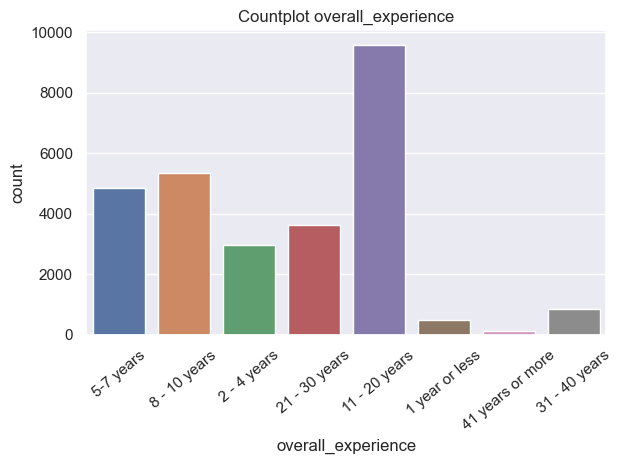

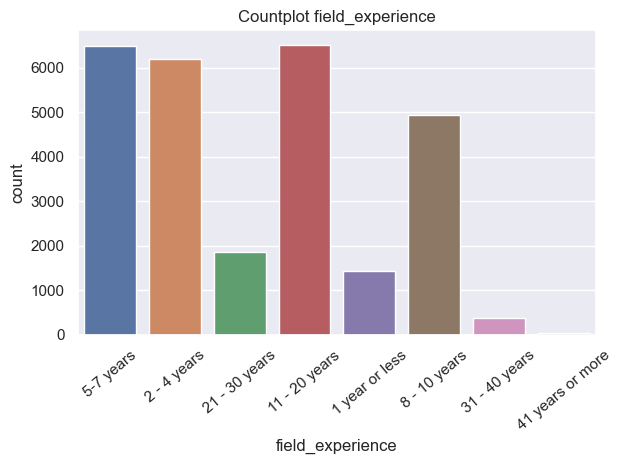

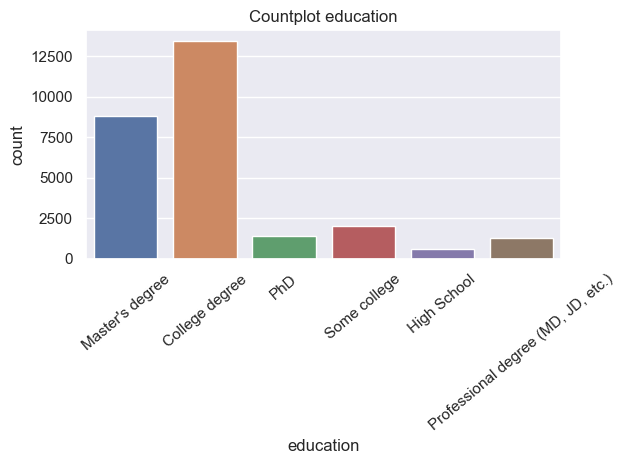

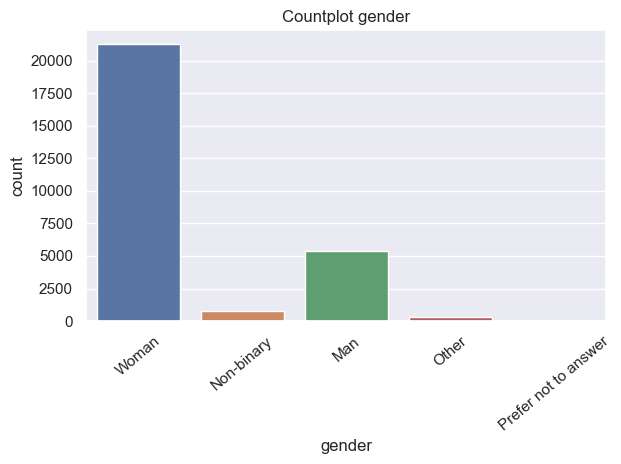

In [22]:
for column_name in categorical_columns:
    fig, axes = plt.subplots()
    sns.countplot(data=data, x=column_name)
    axes.set_title(f'Countplot {column_name}')
    plt.xticks(rotation=40)
    plt.tight_layout()
    

# Multivar analysis

In [42]:
data_extended = pd.get_dummies(data=data, columns=categorical_columns) 
data_extended

,industry,country,annual_income_usd,compensation_usd,race_White,"race_Hispanic, Latino, or Spanish origin",race_Asian or Asian American,race_Another option not listed here or prefer not to answer,race_Middle Eastern or Northern African,race_Black or African American,...,education_High School,education_Master's degree,education_PhD,"education_Professional degree (MD, JD, etc.)",education_Some college,gender_Man,gender_Non-binary,gender_Other,gender_Prefer not to answer,gender_Woman
0,Education (Higher Education),United States,55000,0.0,True,False,False,False,False,False,...,0,1,0,0,0,0,0,0,0,1
1,Computing or Tech,United Kingdom,43347,3175.0,True,False,False,False,False,False,...,0,0,0,0,0,0,1,0,0,0
2,"Accounting, Banking & Finance",Australia,34000,0.0,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,1
3,Nonprofits,Cyprus,62000,3000.0,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,1
4,"Accounting, Banking & Finance",Australia,60000,7000.0,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27844,Clinical research and development,Australia,49214,703.0,True,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
27845,"Accounting, Banking & Finance",United States,64000,0.0,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,1
27846,Law,Nigeria,7767100,0.0,False,False,False,True,False,False,...,0,1,0,0,0,0,0,0,0,1
27847,"Accounting, Banking & Finance",Australia,83000,0.0,True,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,0


In [46]:
cols_to_analyze = []
for col_name in data_extended.columns:
    if col_name not in ['industry',
                        'country',
                        ]:
        cols_to_analyze.append(col_name)
cols_to_analyze

['annual_income_usd',
 'compensation_usd',
 'race_White',
 'race_Hispanic, Latino, or Spanish origin',
 'race_Asian or Asian American',
 'race_Another option not listed here or prefer not to answer',
 'race_Middle Eastern or Northern African',
 'race_Black or African American',
 'race_Native American or Alaska Native',
 'income',
 'age_18-24',
 'age_25-34',
 'age_35-44',
 'age_45-54',
 'age_55-64',
 'age_65 or over',
 'age_under 18',
 'overall_experience_1 year or less',
 'overall_experience_11 - 20 years',
 'overall_experience_2 - 4 years',
 'overall_experience_21 - 30 years',
 'overall_experience_31 - 40 years',
 'overall_experience_41 years or more',
 'overall_experience_5-7 years',
 'overall_experience_8 - 10 years',
 'field_experience_1 year or less',
 'field_experience_11 - 20 years',
 'field_experience_2 - 4 years',
 'field_experience_21 - 30 years',
 'field_experience_31 - 40 years',
 'field_experience_41 years or more',
 'field_experience_5-7 years',
 'field_experience_8 - 10 

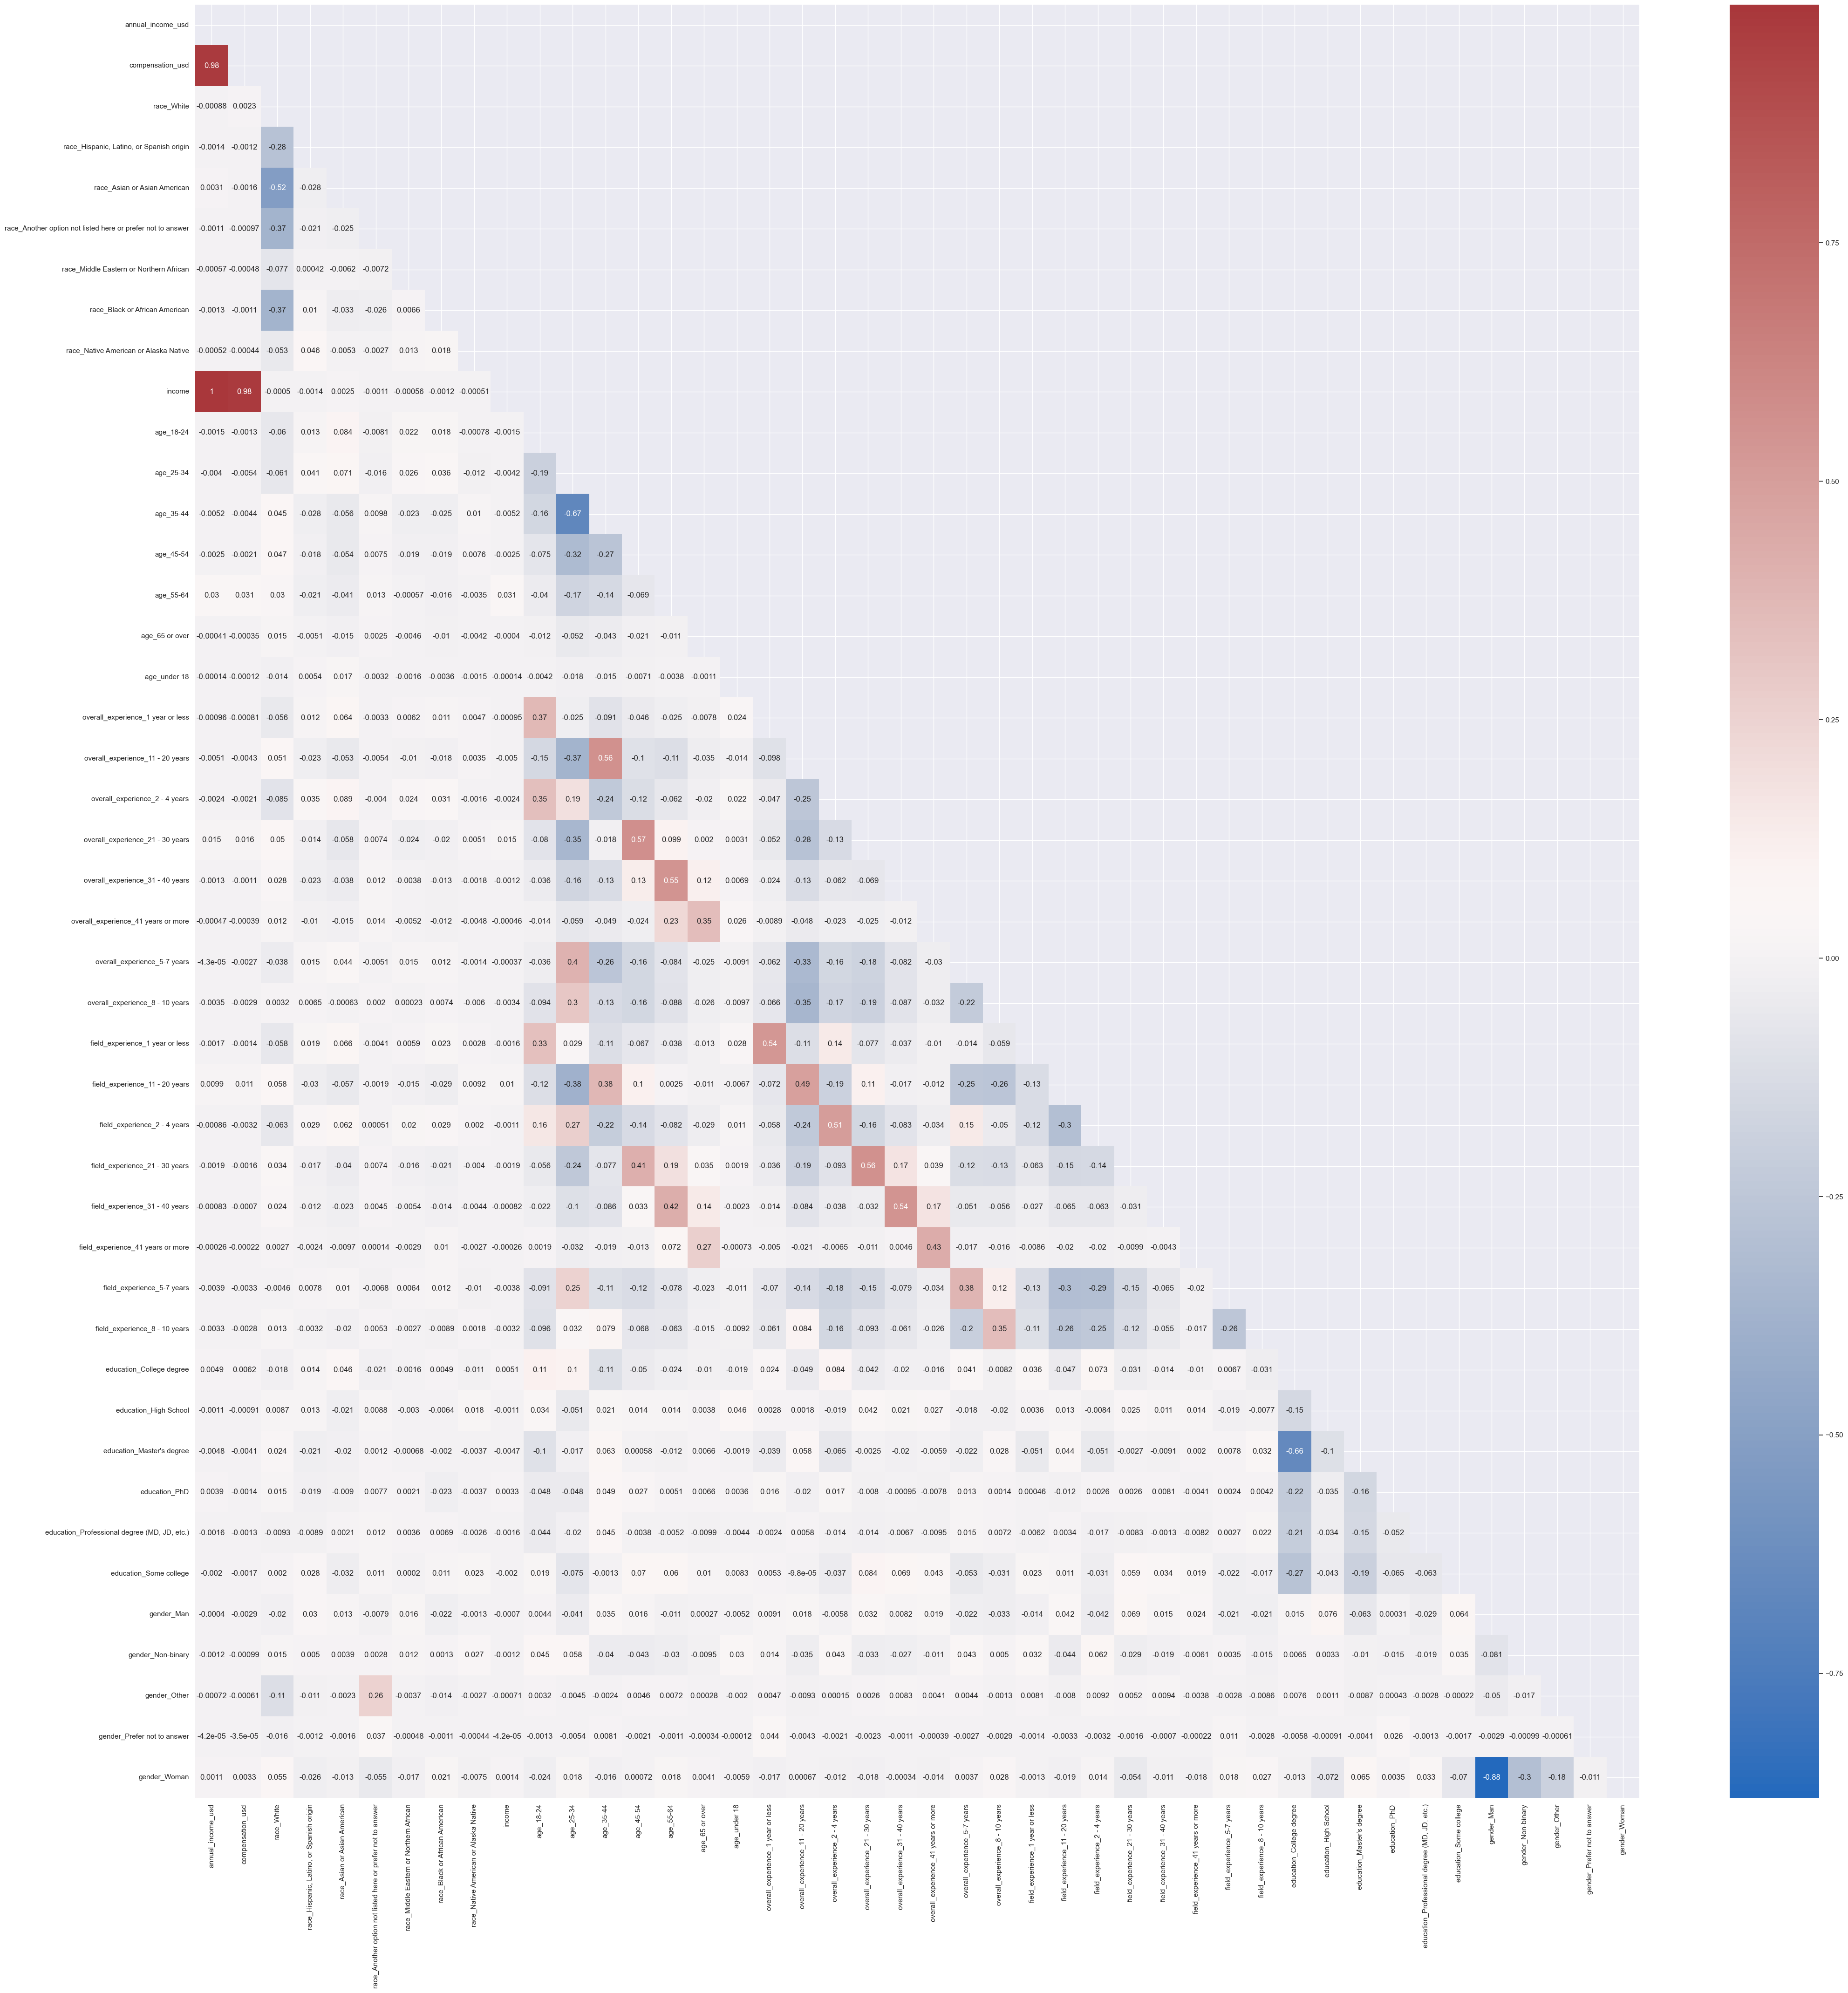

In [61]:
sns.set_theme()
fig, axes = plt.subplots(figsize=(50,50) )
corr_matrix = data_extended[cols_to_analyze].corr()
mask = np.triu(np.ones_like(corr_matrix))
gr = sns.heatmap(data=corr_matrix, mask=mask, cmap='vlag', annot=True)
plt.savefig('CorrelMatrix.pdf')

In [51]:
corr_matrix

,annual_income_usd,compensation_usd,race_White,"race_Hispanic, Latino, or Spanish origin",race_Asian or Asian American,race_Another option not listed here or prefer not to answer,race_Middle Eastern or Northern African,race_Black or African American,race_Native American or Alaska Native,income,...,education_High School,education_Master's degree,education_PhD,"education_Professional degree (MD, JD, etc.)",education_Some college,gender_Man,gender_Non-binary,gender_Other,gender_Prefer not to answer,gender_Woman
annual_income_usd,1.000000,0.979260,-0.000879,-0.001421,0.003095,-0.001149,-0.000565,-0.001269,-0.000521,0.999708,...,-0.001080,-0.004821,0.003878,-0.001577,-0.001992,-0.000397,-0.001170,-0.000724,-0.000042,0.001084
compensation_usd,0.979260,1.000000,0.002315,-0.001203,-0.001571,-0.000972,-0.000478,-0.001073,-0.000441,0.983870,...,-0.000914,-0.004078,-0.001389,-0.001337,-0.001684,-0.002935,-0.000990,-0.000614,-0.000035,0.003334
race_White,-0.000879,0.002315,1.000000,-0.283198,-0.515219,-0.369050,-0.076985,-0.366914,-0.053265,-0.000501,...,0.008697,0.024197,0.015307,-0.009348,0.002037,-0.020133,0.014717,-0.114276,-0.015505,0.054825
"race_Hispanic, Latino, or Spanish origin",-0.001421,-0.001203,-0.283198,1.000000,-0.028450,-0.020857,0.000425,0.010221,0.046237,-0.001399,...,0.013135,-0.021401,-0.018623,-0.008851,0.027857,0.030057,0.005008,-0.011378,-0.001203,-0.025631
race_Asian or Asian American,0.003095,-0.001571,-0.515219,-0.028450,1.000000,-0.025084,-0.006171,-0.033473,-0.005331,0.002547,...,-0.021342,-0.020154,-0.008991,0.002054,-0.032235,0.012974,0.003913,-0.002348,-0.001573,-0.013089
race_Another option not listed here or prefer not to answer,-0.001149,-0.000972,-0.369050,-0.020857,-0.025084,1.000000,-0.007229,-0.026450,-0.002655,-0.001130,...,0.008762,0.001167,0.007727,0.011844,0.010954,-0.007911,0.002785,0.256499,0.036889,-0.054704
race_Middle Eastern or Northern African,-0.000565,-0.000478,-0.076985,0.000425,-0.006171,-0.007229,1.000000,0.006637,0.012704,-0.000556,...,-0.003025,-0.000685,0.002113,0.003550,0.000198,0.015917,0.012181,-0.003695,-0.000478,-0.017411
race_Black or African American,-0.001269,-0.001073,-0.366914,0.010221,-0.033473,-0.026450,0.006637,1.000000,0.017957,-0.001248,...,-0.006407,-0.001981,-0.022647,0.006902,0.010925,-0.022250,0.001342,-0.014236,-0.001072,0.021215
race_Native American or Alaska Native,-0.000521,-0.000441,-0.053265,0.046237,-0.005331,-0.002655,0.012704,0.017957,1.000000,-0.000513,...,0.018434,-0.003664,-0.003676,-0.002551,0.022633,-0.001334,0.027497,-0.002695,-0.000441,-0.007489
income,0.999708,0.983870,-0.000501,-0.001399,0.002547,-0.001130,-0.000556,-0.001248,-0.000513,1.000000,...,-0.001063,-0.004743,0.003258,-0.001552,-0.001959,-0.000700,-0.001151,-0.000713,-0.000042,0.001354
